In [ ]:
# Model hazırlayarkən ən az iki model yaratmaq lazımdır --
# 1 baseline model və 1 daha yaxşı performans göstərən model (Reqressiya, klassifikasiya, klasterinq məsələlərində).
# İdeal klaster sayını seçərkən ən az iki metod istifadə etmək lazımdır (Klasterinq məsələsində).

In [ ]:
!kaggle datasets download sehriyarmemmedli/binaaz-rent-project #Kaggle Datasetinin Yüklənməsi
!unzip binaaz-rent-project.zip #Zip Faylının Açılması

Dataset URL: https://www.kaggle.com/datasets/sehriyarmemmedli/binaaz-rent-project
,License(s): unknown
,binaaz-rent-project.zip: Skipping, found more recently modified local copy (use --force to force download)
,Archive:  binaaz-rent-project.zip
,replace house_rent.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#kitabxanalar import olunur
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/house_rent.csv")  # Dataset yüklənir

<ipython-input-37-6b00c16fed50>:5: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
,  df=pd.read_csv("/content/house_rent.csv")  # Dataset yüklənir


In [ ]:
df

,id_x,rel_url,estate_rel_url_x,datetime_scrape_x,price,currency_x,billing_cycle_x,location,attributes,city_when,...,Binanın növü,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,estate_details_id_y,estate_rel_url,extra_info
0,ab0c8405-2ffd-4c97-bc11-8251bcd66a00,/kiraye?page=64,/items/4660031,2024-10-05 22:28:16.668326+00,219.0,AZN,ay,Gənclik m.,"3 otaqlı, 198 m², 5/16 mərtəbə","Bakı, dünən 23:48",...,NaN,Yeni tikili,5 / 16,3.0,198 m²,NaN,var,dad15c43-2b3e-4e59-a1d0-6cab49800f18,/items/4660031,Azərbaycan turizm institutu * Gənclik m.* Nəri...
1,9c448fe1-9d6b-4edc-a707-8941f718edff,/kiraye?page=64,/items/4669283,2024-10-05 22:28:16.668326+00,700.0,AZN,ay,8 Noyabr m.,"2 otaqlı, 90 m², 14/17 mərtəbə","Bakı, dünən 23:45",...,NaN,Yeni tikili,14 / 17,2.0,90 m²,NaN,var,6b5d9e1b-fabe-4300-b616-cd0fdadac7a7,/items/4669283,8 Noyabr m.* Nəsimi r.
2,c432b5fc-a490-4f90-bb49-884aa589950d,/kiraye?page=64,/items/4650898,2024-10-05 22:28:16.668326+00,1500.0,AZN,ay,Nizami m.,"3 otaqlı, 170 m², 4/17 mərtəbə","Bakı, dünən 23:17",...,NaN,Yeni tikili,4 / 17,3.0,170 m²,NaN,var,e57ce6a1-45d9-4542-96fa-81a577bb504c,/items/4650898,Beşmərtəbə * Qış parkı * Mərkəzi Univermaq * N...
3,8d7db8f6-eea5-4235-9c52-e748b7f6ab74,/kiraye?page=64,/items/4669259,2024-10-05 22:28:16.668326+00,1500.0,AZN,ay,Bayıl q.,"2 otaqlı, 80 m², 13/16 mərtəbə","Bakı, dünən 23:15",...,NaN,Yeni tikili,13 / 16,2.0,80 m²,NaN,var,1896351f-a234-493a-bdd7-f565ef41aeb1,/items/4669259,Bayıl parkı * Səbail r.* Bayıl q.
4,1a145395-63f3-4eb0-940b-fa449fa63a43,/kiraye?page=64,/items/4655661,2024-10-05 22:28:16.668326+00,1000.0,AZN,ay,Nəsimi r.,"2 otaqlı, 70 m², 6/11 mərtəbə","Bakı, dünən 23:13",...,NaN,Yeni tikili,6 / 11,2.0,70 m²,NaN,var,28bef467-f183-42f6-92ef-86b5c0107472,/items/4655661,Port Baku * Cavanşir körpüsü * Crescent Bay *...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33890,92849b3f-c70e-48fd-8dea-7502515a76c1,/kiraye?page=102,/items/4283157,2024-11-19 20:54:12.281354,800.0,AZN,ay,Nəsimi r.,"3 otaqlı, 200 m², 15/18 mərtəbə","Bakı, dünən 14:18",...,NaN,Yeni tikili,15 / 18,3.0,200 m²,NaN,var,990ce954-d7b7-4c6f-9db1-ff294020c0a0,/items/4283157,Tibb Universiteti * ASAN Xidmət №1 * Nəsimi r.
33891,585e8d25-b407-42c7-ace8-7c00d3063970,/kiraye?page=102,/items/4773425,2024-11-19 20:54:12.281354,1500.0,AZN,ay,Sahil m.,"2 otaqlı, 110 m², 8/17 mərtəbə","Bakı, dünən 14:17",...,NaN,Yeni tikili,8 / 17,2.0,110 m²,NaN,var,18452e53-1ea4-4f54-b700-a2b03f07808e,/items/4773425,Xaqani bağı * Nizami kinoteatrı * Sahil m.* Sa...
33892,35d7f87f-274d-47f0-9e23-86b63c3650e8,/kiraye?page=102,/items/4773422,2024-11-19 20:54:12.281354,1400.0,AZN,ay,28 May m.,"4 otaqlı, 200 m², 12/18 mərtəbə","Bakı, dünən 14:17",...,NaN,Yeni tikili,12 / 18,4.0,200 m²,NaN,var,a5a110ad-d965-4b72-bfd5-1739bd34801d,/items/4773422,Zoopark * Dostluq kinoteatrı * 28 May m.* Nəsi...
33893,225a47f4-fa7f-4465-82fc-56eaa6e2e851,/kiraye?page=102,/items/4773421,2024-11-19 20:54:12.281354,2500.0,AZN,ay,Əhmədli m.,120 m²,"Bakı, dünən 14:17",...,NaN,Obyekt,NaN,NaN,120 m²,NaN,var,909fd16e-61e5-4fb8-99d1-6dcfb9e05807,/items/4773421,Əhmədli m.* Xalqlar Dostluğu m.* Xətai r.


#məlumatların təmizlənməsi və uyğun formata salınması

In [ ]:
df = df.drop(columns=[
    "id_x", "rel_url", "estate_rel_url_x", "datetime_scrape_x", "day_x", "hour_x", "vip", "featured",
    "products_label", "img_url", "id_y", "estate_id", "estate_rel_url_y", "datetime_scrape_y",
    "owner_name", "owner_title", "shop_name", "shop_title", "updated", "day_y", "hour_y", "estate_details_id_x",
    "Binanın növü", "estate_details_id_y", "estate_rel_url", "extra_info", 'currency_y', "lat","lng","billing_cycle_x",
    "billing_cycle_y","currency_x","address",'city_when','repair','description',"attributes",'views'])
# Müəyyən sütunları DataFrame-dən silirik

In [ ]:
# df.columns
print(df.isnull().sum()) #Bu kod, hər bir sütundakı boş (NaN) dəyərləri sayır və onların cəmini göstərir.

price                0
,location             0
,city                 0
,total_price          0
,Kateqoriya           0
,Mərtəbə           9136
,Otaq sayı         4030
,Sahə                 0
,Torpaq sahəsi    30806
,Təmir              491
,dtype: int64


In [ ]:
# Uyğunsuz formatlı və ya boş olanları "0" ilə dolduraq
df['Mərtəbə'] = df['Mərtəbə'].fillna("0 / 0")  # Boşları '0 / 0' ilə doldururuq

# "Mərtəbə"ni yenidən bölək və ədədi formata çevirək
df[['floor', 'total_floors']] = df['Mərtəbə'].str.split(' / ', expand=True)

# floor və total_floors-u ədədi formata çevirək
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').round()
df['total_floors'] = pd.to_numeric(df['total_floors'], errors='coerce')

In [ ]:
df=df.drop(columns=['Mərtəbə']) #mertebe sutununu bolub ayirdigimiz ucun silirik

In [ ]:
df["Sahə"] = df["Sahə"].astype(str).str.replace(" m²", "", regex=True) #"Sahə" sütunundakı bütün dəyərləri string (mətni) tipinə çevirir və sonra " m²" simvolunu silir.
df["Sahə"] = pd.to_numeric(df["Sahə"], errors="coerce")  #"Sahə" sütunundakı string dəyərləri rəqəm (numeric) tipinə çevirir.
df['Sahə']=df['Sahə'].fillna(df['Sahə'].median()) #"Sahə" sütunundakı boş (NaN) dəyərləri median (orta) dəyərlə doldurur.

In [ ]:
# Torpaq sahəsi sütununu string formatına çeviririk
df["Torpaq sahəsi"] = df["Torpaq sahəsi"].astype(str)

# "sot" sözünü silirik və boşluqları təmizləyirik
df["Torpaq sahəsi"] = df["Torpaq sahəsi"].str.replace("sot", "").str.strip()

# Sonra ədədi formata çeviririk
df["Torpaq sahəsi"] = pd.to_numeric(df["Torpaq sahəsi"], errors="coerce")

In [ ]:
# NaN olan dəyərləri median ilə doldururuq
df['Torpaq sahəsi'] = df['Torpaq sahəsi'].fillna(df['Torpaq sahəsi'].median())

In [ ]:
# Torpaq sahəsi sütunundakı boş dəyərləri yoxlayaq
print(df['Torpaq sahəsi'].isnull().sum())

0


In [ ]:
df["Otaq sayı"] = df["Otaq sayı"].fillna(0).round().astype(int) #"Otaq sayı" sütununda olan boş (NaN) dəyərləri doldurur, onları yuvarlayır və tam ədəd (integer) tipinə çevirir.

In [ ]:
df['Təmir'] = df['Təmir'].apply(lambda x: 1 if x == 'var' else 0) #"Təmir" sütunundakı dəyərləri 0 və 1 kimi ikili (binary) qiymətlərə çevirir.

In [ ]:
df["price"] = df["price"].round().astype(int)

In [ ]:
df["price_per_sqm"] = df["total_price"] / df["Sahə"] #"price_per_sqm" (kvadrat metr başına qiymət) sütunu yaradır.

In [ ]:
df

,price,location,city,total_price,Kateqoriya,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,floor,total_floors,price_per_sqm
0,219,Gənclik m.,bakı,219.0,Yeni tikili,3,198.0,8.0,1,5,16,1.106061
1,700,8 Noyabr m.,bakı,700.0,Yeni tikili,2,90.0,8.0,1,14,17,7.777778
2,1500,Nizami m.,bakı,1500.0,Yeni tikili,3,170.0,8.0,1,4,17,8.823529
3,1500,Bayıl q.,bakı,1500.0,Yeni tikili,2,80.0,8.0,1,13,16,18.750000
4,1000,Nəsimi r.,bakı,1000.0,Yeni tikili,2,70.0,8.0,1,6,11,14.285714
...,...,...,...,...,...,...,...,...,...,...,...,...
33890,800,Nəsimi r.,bakı,800.0,Yeni tikili,3,200.0,8.0,1,15,18,4.000000
33891,1500,Sahil m.,bakı,1500.0,Yeni tikili,2,110.0,8.0,1,8,17,13.636364
33892,1400,28 May m.,bakı,1400.0,Yeni tikili,4,200.0,8.0,1,12,18,7.000000
33893,2500,Əhmədli m.,bakı,2500.0,Obyekt,0,120.0,8.0,1,0,0,20.833333


In [ ]:
print(df.isnull().sum()) #datadaki nan deyerleri yoxlayiriq

price            0
,location         0
,city             0
,total_price      0
,Kateqoriya       0
,Otaq sayı        0
,Sahə             0
,Torpaq sahəsi    0
,Təmir            0
,floor            0
,total_floors     0
,price_per_sqm    0
,dtype: int64


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

from sklearn.preprocessing import StandardScaler

num_features = ["price", "total_price", "Otaq sayı", "Sahə", "Torpaq sahəsi", "floor", "total_floors", "price_per_sqm"]

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [ ]:
print(df.columns)

Index(['price', 'location', 'city', 'total_price', 'Kateqoriya', 'Otaq sayı',
,       'Sahə', 'Torpaq sahəsi', 'Təmir', 'floor', 'total_floors',
,       'price_per_sqm'],
,      dtype='object')


Asagidaki kod KMeans klasterləşdirmə alqoritmasından istifadə edərək müxtəlif k dəyərləri üçün inertia və silhouette score analizlərini aparır və hər iki nəticəni vizuallaşdırır.

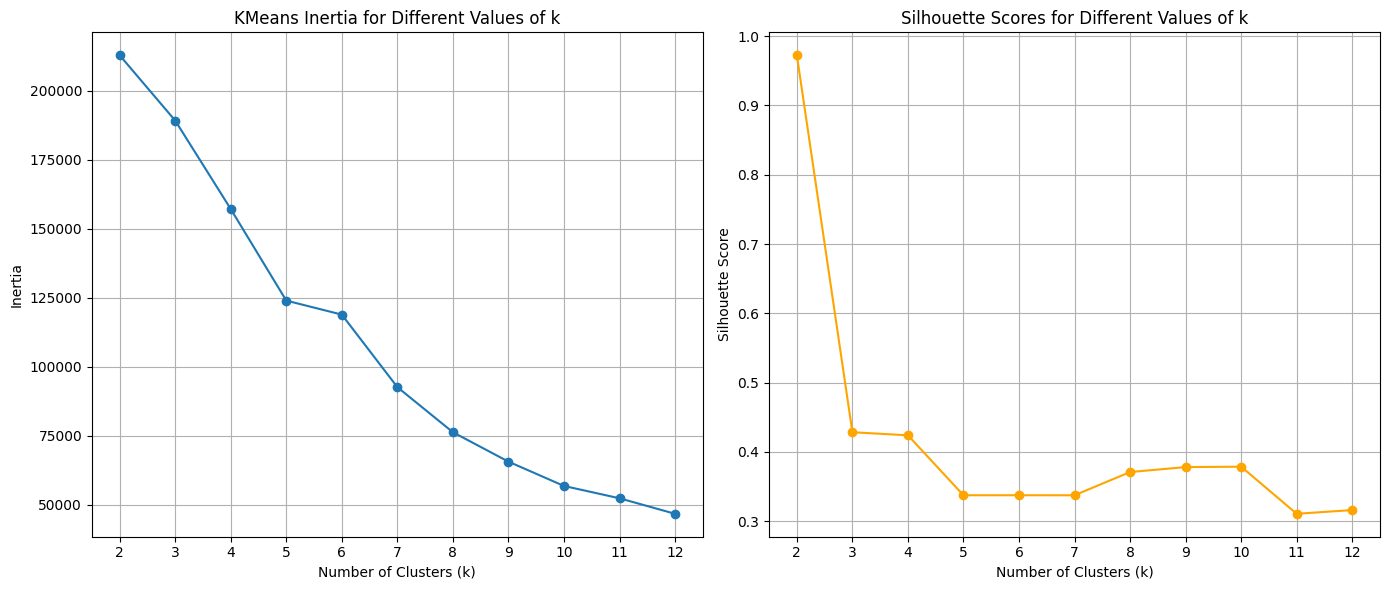

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

max_k = 12
inertia = []
silhouette_scores_list = []

k_values = range(2, max_k + 1)

num_features = ["price", "total_price", "Otaq sayı", "Sahə", "Torpaq sahəsi", "floor", "total_floors", "price_per_sqm"]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(df[num_features])
    sil_score = silhouette_score(df[num_features], cluster_labels)
    silhouette_scores_list.append(sil_score)
    inertia.append(kmeans.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(k_values, inertia, marker="o")
axes[0].set_title('KMeans Inertia for Different Values of k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(k_values)
axes[0].grid(True)

axes[1].plot(k_values, silhouette_scores_list, marker="o", color="orange")
axes[1].set_title('Silhouette Scores for Different Values of k')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

plt.tight_layout()
plt.show()


 KMeans alqoritmasından istifadə edərək, n_clusters=4 parametrini təyin edərək 4 klasterə ayırma əməliyyatını həyata keçirir.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(df[num_features])
cluster_labels

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

Bu kod, KMeans alqoritmasını istifadə edərək 3D Scatter Plot vizualizasiyası yaradaraq, əmlakları klasterlərə ayırır və klasterlərin müxtəlif xüsusiyyətlərə görə necə qruplaşdığını göstərir.

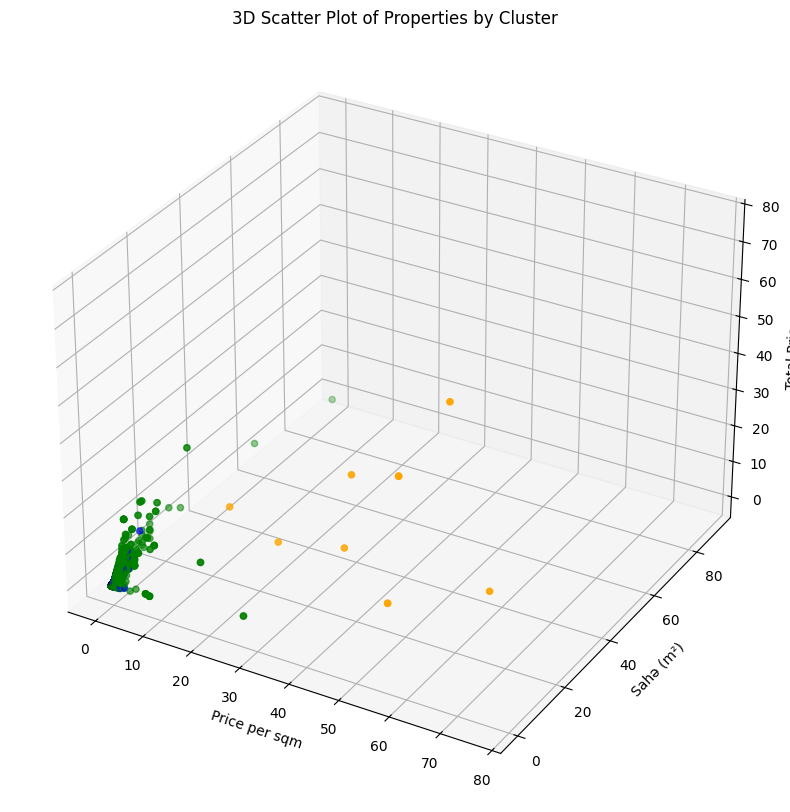

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

max_k = 12
inertia = []
silhouette_scores_list = []

k_values = range(2, max_k + 1)

num_features = ["price", "total_price", "Otaq sayı", "Sahə", "Torpaq sahəsi", "floor", "total_floors", "price_per_sqm"]

best_k = 3

kmeans = KMeans(n_clusters=best_k, random_state=42, max_iter=1000)
df["Cluster"] = kmeans.fit_predict(df[num_features])

cluster_colors = {
    0: "blue",
    1: "orange",
    2: "green",
    3: "red"
}

colors = df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(df['price_per_sqm'],  #
                     df['Sahə'],
                     df["total_price"],
                     c=colors,
                     marker='o')

ax.set_xlabel('Price per sqm')
ax.set_ylabel('Sahə (m²)')
ax.set_zlabel('Total Price')
ax.set_title('3D Scatter Plot of Properties by Cluster')
plt.show()

Optimal K (klaster sayını) tapmaq üçün istifadə olunur.

In [ ]:
def optimal_k(inertia, silhouette_scores, max_clusters=10):

    if not inertia:
        return 3

    inertia_diff = np.diff(inertia)
    inertia_diff2 = np.diff(inertia_diff)

    elbow_k = np.argmin(inertia_diff2) + 2
    best_silhouette_k = np.argmax(silhouette_scores) + 2

    if abs(elbow_k - best_silhouette_k) > 2:
        final_k = round((elbow_k + best_silhouette_k) / 2)
    else:
        final_k = best_silhouette_k
    return final_k

best_k = optimal_k(inertia, silhouette_scores_list)
print(f"Optimal Klaster Sayı: {best_k}")

,Optimal Klaster Sayı: 3


Elbow Method istifadə edərək optimal klaster sayını tapmaq və sonra KMeans alqoritması ilə əmlakları bu klasterlərə ayırmaq üçün yazılıb.

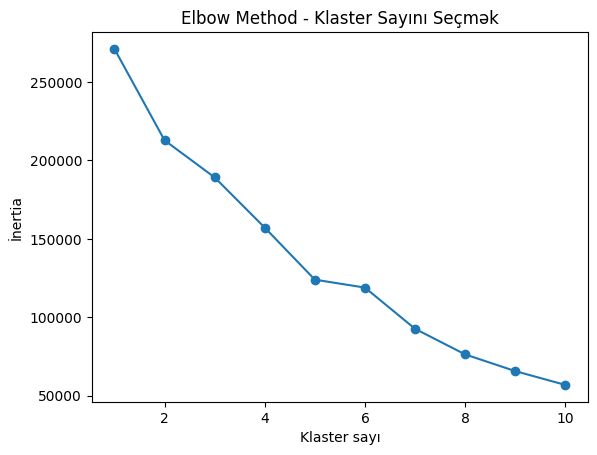

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

max_clusters = 10
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[num_features])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method - Klaster Sayını Seçmək')
plt.xlabel('Klaster sayı')
plt.ylabel('İnertia')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df[num_features])

df['Cluster'] = kmeans.labels_

#Cluster Analizi

In [ ]:
cluster_means = df.groupby("Cluster")[num_features].mean()
print("Clusterlərin Ortalamaları:")
print(cluster_means)

cluster_stats = df.groupby("Cluster")[num_features].describe()
print(" Klasterlərin Statistik Göstəriciləri:")
print(cluster_stats)

Clusterlərin Ortalamaları:
,             price  total_price  Otaq sayı      Sahə  Torpaq sahəsi     floor  \
,Cluster                                                                         
,0        -0.093932    -0.093932   0.240733 -0.081364      -0.006091  0.196294   
,1        38.727025    38.727025  -1.283700 -0.284742      -0.016002 -0.722904   
,2         0.434688     0.434688  -1.299212  0.440580      -0.014910 -1.059692   
,3         0.045590     0.045590  -0.347589 -0.166838     126.590738 -1.077742   
,
,         total_floors  price_per_sqm  
,Cluster                               
,0            0.109727      -0.042852  
,1           -0.465031      53.174184  
,2           -0.592242       0.131131  
,3           -0.605070       0.100038  
, Klasterlərin Statistik Göstəriciləri:
,           price                                                         \
,           count       mean        std        min        25%        50%   
,Cluster                                       

In [ ]:
print(df.columns)  # DataFrame-dəki bütün sütunları göstərin

Index(['price', 'location', 'city', 'total_price', 'Kateqoriya', 'Otaq sayı',
,       'Sahə', 'Torpaq sahəsi', 'Təmir', 'floor', 'total_floors',
,       'price_per_sqm', 'Cluster'],
,      dtype='object')


Iki fərqli vizualizasiya yaradır:Boxplot ve Violinplot.






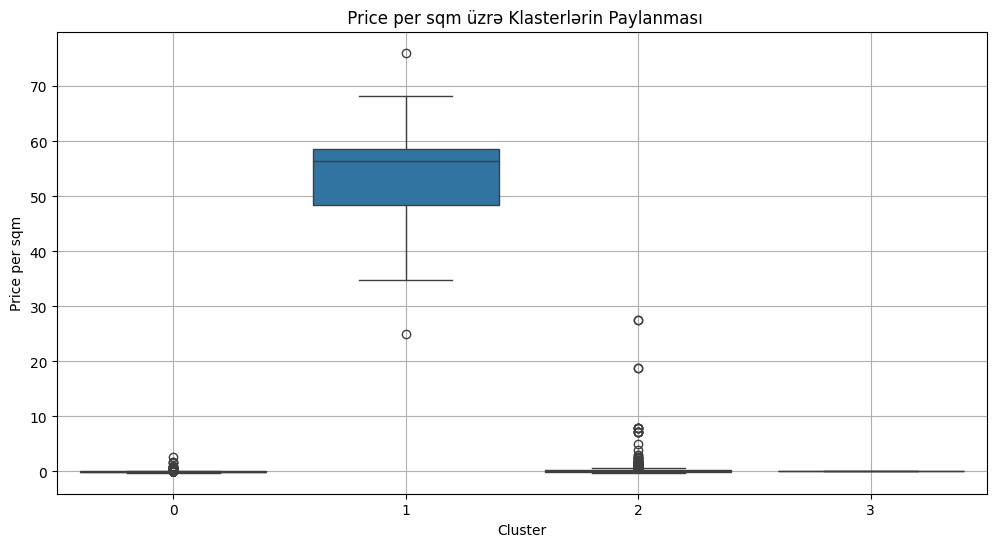

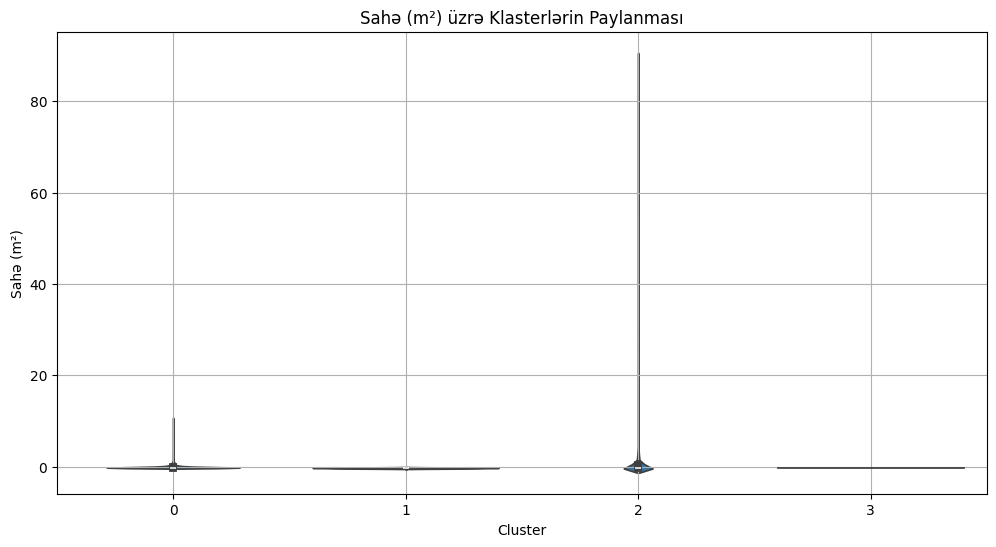

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Cluster"], y=df["price_per_sqm"])
plt.title(" Price per sqm üzrə Klasterlərin Paylanması")
plt.xlabel("Cluster")
plt.ylabel("Price per sqm")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x=df["Cluster"], y=df["Sahə"])
plt.title("Sahə (m²) üzrə Klasterlərin Paylanması")
plt.xlabel("Cluster")
plt.ylabel("Sahə (m²)")
plt.grid(True)
plt.show()

Bu kod multi-boxplot yaradır, yəni bir neçə xüsusiyyətin (features) hər klaster üzrə paylanmasını müqayisə edir.

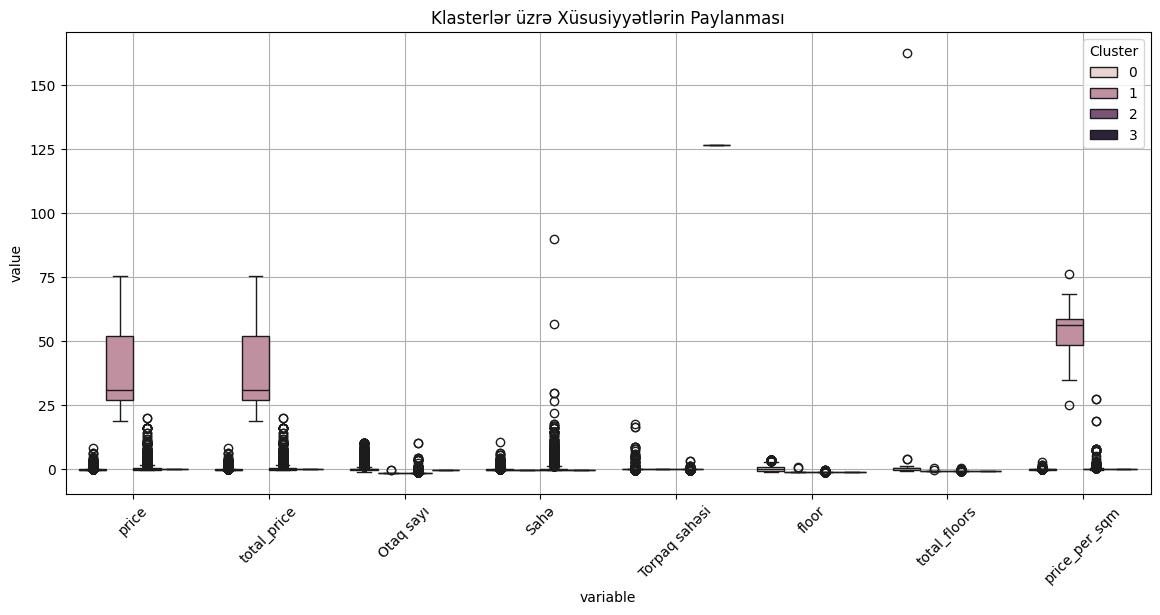

In [ ]:
df_melted = df.melt(id_vars=["Cluster"], value_vars=num_features)

plt.figure(figsize=(14, 6))
sns.boxplot(x="variable", y="value", hue="Cluster", data=df_melted)
plt.xticks(rotation=45)
plt.title("Klasterlər üzrə Xüsusiyyətlərin Paylanması")
plt.grid(True)
plt.show()

#Vizuallasdirma

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
,  fig.canvas.print_figure(bytes_io, **kw)


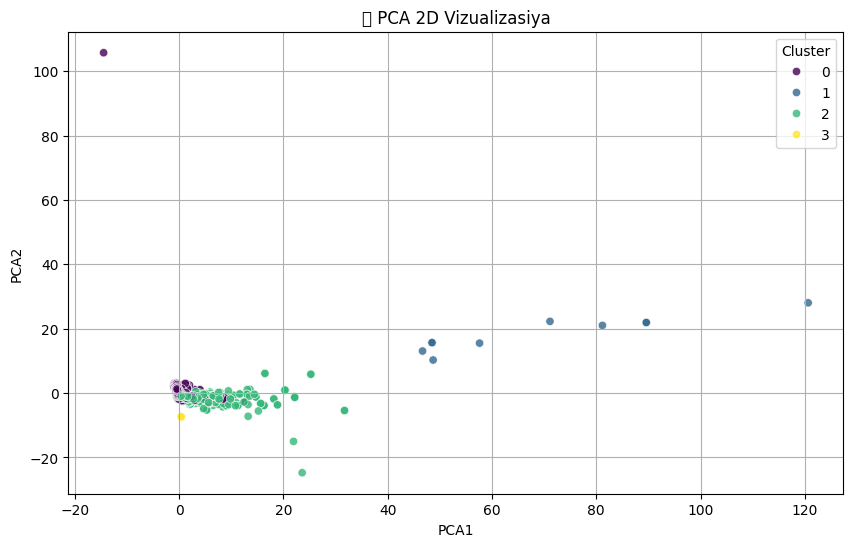

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA ilə ölçünü 2D-ə salırıq
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(df[num_features])

df["PCA1"] = pca_result_2d[:, 0]
df["PCA2"] = pca_result_2d[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.8)
plt.title("🔹 PCA 2D Vizualizasiya")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
#KMeans klasterinq alqoritmini istifadə edərək əmlak məlumatlarını 3 klasterə ayırır və
#klaster etiketlərini df DataFrame-inə əlavə edir.kmeans = KMeans(n_clusters=3, random_state=42)

df['cluster'] = kmeans.fit_predict(df[num_features])
print(df[['price', 'total_price', 'Otaq sayı', 'Sahə', 'price_per_sqm', 'cluster']].head())

      price  total_price  Otaq sayı      Sahə  price_per_sqm  cluster
,0 -0.320077    -0.320077   0.237480  0.127920      -0.207684        0
,1 -0.221320    -0.221320  -0.347589 -0.196916      -0.099023        0
,2 -0.057068    -0.057068   0.237480  0.043703      -0.081991        0
,3 -0.057068    -0.057068  -0.347589 -0.226993       0.079679        0
,4 -0.159726    -0.159726  -0.347589 -0.257071       0.006970        0


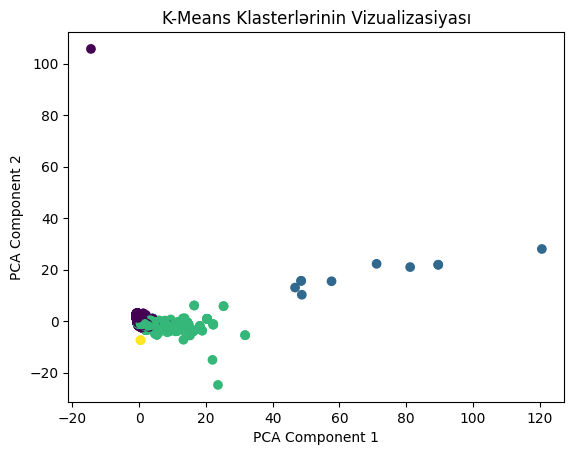

In [ ]:
#Principal Component Analysis (PCA) və K-Means klasterinq nəticələrini vizuallaşdırmaq üçün istifadə edilir.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[num_features])

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-Means Klasterlərinin Vizualizasiyası')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
#Bu kod Davies-Bouldin Index (DBI) metrikasını hesablayaraq klasterlərin keyfiyyətini ölçür.
from sklearn.metrics import davies_bouldin_score

df['cluster'] = kmeans.labels_

db_score = davies_bouldin_score(df[num_features], df['cluster'])
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 0.7728719948086017


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_features])

y_kmeans = kmeans.labels_

sil_score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {sil_score}")

db_score = davies_bouldin_score(X_scaled, y_kmeans)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette Score: 0.4239305660927875
,Davies-Bouldin Index: 0.7728719948086017


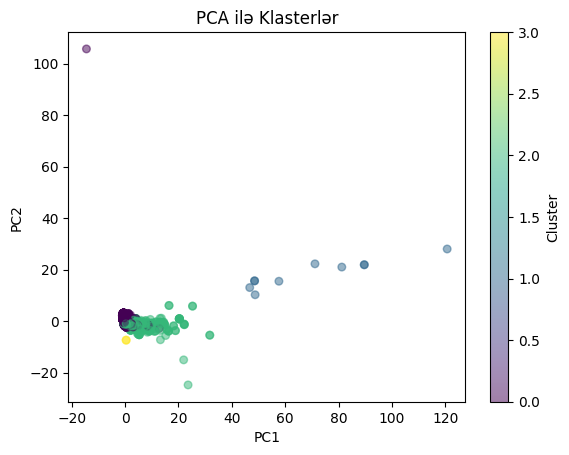

In [ ]:
#Principal Component Analysis (PCA) metodundan istifadə edərək klasterlərin 2D müstəviyə proyeksiyasını vizuallaşdırır.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_features])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df["Cluster"], cmap="viridis", s=30, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA ilə Klasterlər")
plt.colorbar(label='Cluster')
plt.show()